<a href="https://colab.research.google.com/github/PatWoo23/CreditRiskAnalysis_Project/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/MIS584/project/credit_card_transactions_processed3.csv')
print(df.shape)
df.head()

(1296675, 54)


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,category_shopping_pos,category_travel,gender_M,age_band_20-29,age_band_30-39,age_band_40-49,age_band_50-59,age_band_60-69,age_band_70-79,age_band_80 and over
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,False,False,False,False,True,False,False,False,False,False
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,False,False,False,False,False,True,False,False,False,False
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,False,False,True,False,False,False,True,False,False,False
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,False,False,True,False,False,False,True,False,False,False
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,False,False,True,False,True,False,False,False,False,False


In [ ]:
print(df.columns)

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud', 'merch_zipcode', 'trans_year',
       'trans_month', 'trans_day', 'trans_hour', 'trans_weekday', 'is_weekend',
       'age', 'age_band', 'is_online', 'category_food_dining',
       'category_gas_transport', 'category_grocery_net',
       'category_grocery_pos', 'category_health_fitness', 'category_home',
       'category_kids_pets', 'category_misc_net', 'category_misc_pos',
       'category_personal_care', 'category_shopping_net',
       'category_shopping_pos', 'category_travel', 'gender_M',
       'age_band_20-29', 'age_band_30-39', 'age_band_40-49', 'age_band_50-59',
       'age_band_60-69', 'age_band_70-79', 'age_band_80 and over'],
      dtype='object')


# Should I group the job?

In [ ]:
print(df['job'].unique())

['Psychologist, counselling' 'Special educational needs teacher'
 'Nature conservation officer' 'Patent attorney'
 'Dance movement psychotherapist' 'Transport planner' 'Arboriculturist'
 'Designer, multimedia' 'Public affairs consultant' 'Pathologist'
 'IT trainer' 'Systems developer' 'Engineer, land' 'Systems analyst'
 'Naval architect' 'Radiographer, diagnostic'
 'Programme researcher, broadcasting/film/video' 'Energy engineer'
 'Event organiser' 'Operational researcher' 'Market researcher'
 'Probation officer' 'Leisure centre manager'
 'Corporate investment banker' 'Therapist, occupational'
 'Call centre manager' 'Police officer' 'Education officer, museum'
 'Physiotherapist' 'Network engineer' 'Forensic psychologist' 'Geochemist'
 'Armed forces training and education officer' 'Designer, furniture'
 'Optician, dispensing' 'Psychologist, forensic' 'Librarian, public'
 'Fine artist' 'Scientist, research (maths)'
 'Research officer, trade union' 'Tourism officer'
 'Human resources offi

# Visualization

In [ ]:
def barchart(df, columns, palette="Set2"):
    for column in columns:
        # Plot the bar chart with seaborn
        plt.figure(figsize=(10, 6))
        ax = sns.countplot(data=df, x=column, palette=palette)
        plt.title(column)

        # Add labels to each bar
        for p in ax.patches:
            ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', xytext=(0, 10), textcoords='offset points')

        plt.show()


<ipython-input-24-0fb35c3d1ad3>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=column, palette=palette)


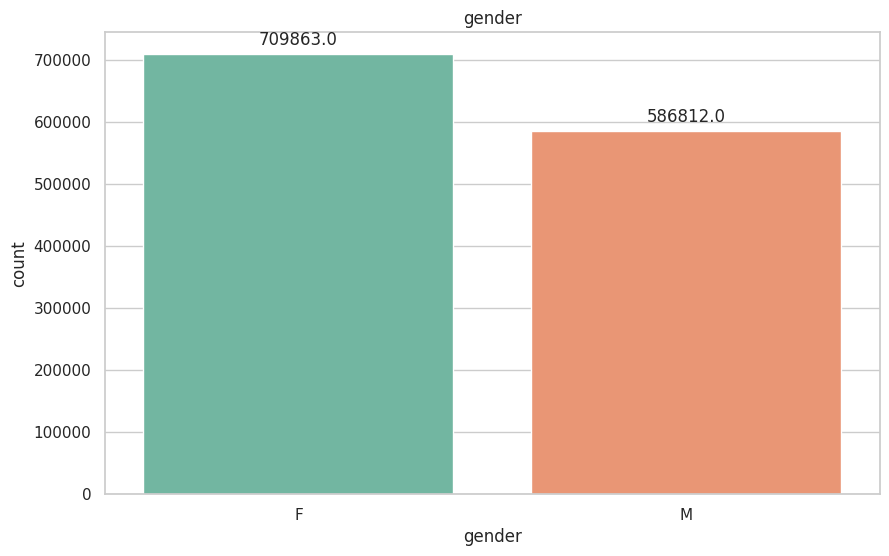

In [ ]:
barchart(df, ['gender'])

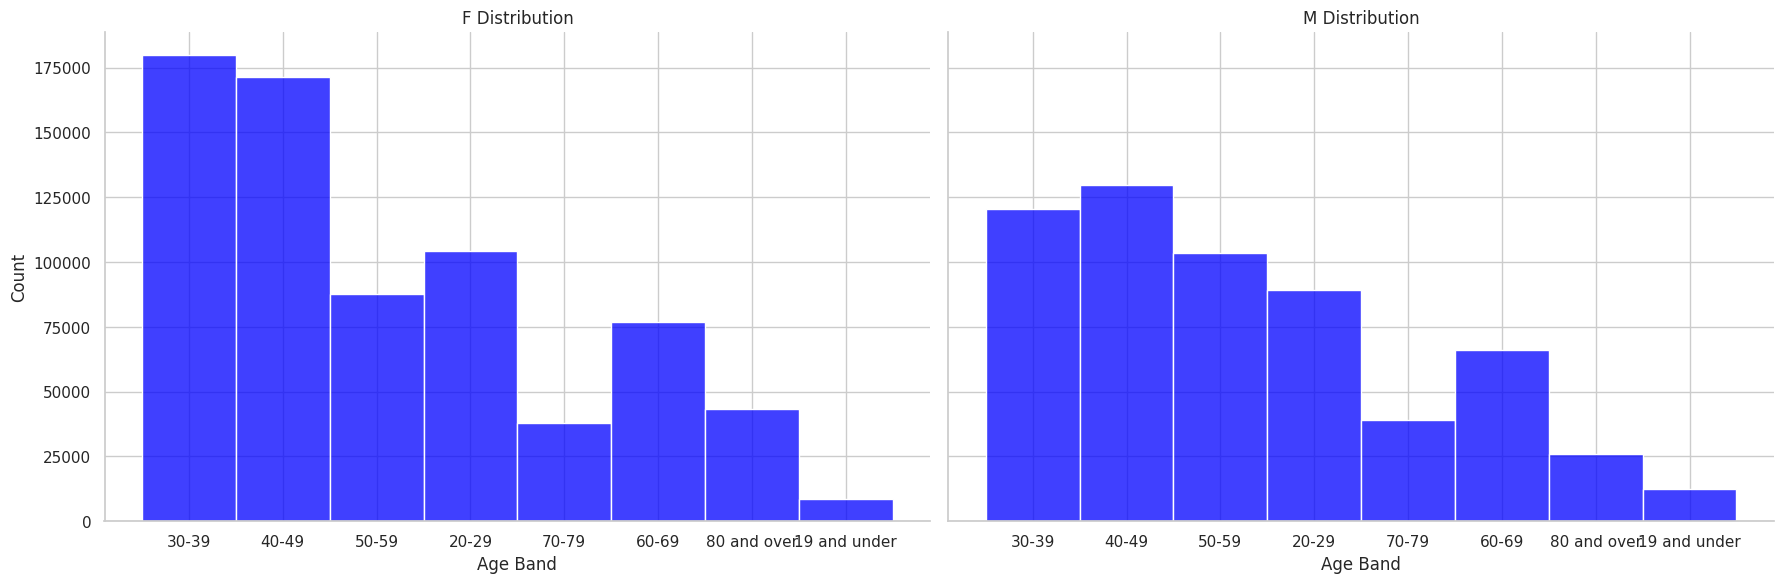

In [ ]:
def plot_age_distribution_by_gender(df, age_column, gender_column):
    # Set the aesthetics for the plot
    sns.set(style="whitegrid")

    # Create the facet grid for each gender6
    g = sns.FacetGrid(df, col=gender_column, height=6, aspect=1.5)

    # Map the histograms to each gender plot
    g.map(sns.histplot, age_column, kde=False, color='blue', bins=16)

    # Set titles and labels
    g.set_axis_labels("Age Band", "Count")
    g.set_titles("{col_name} Distribution")

    plt.show()

# Example usage:
plot_age_distribution_by_gender(df, 'age_band', 'gender')


# Fraudulent Activities

In [ ]:
selected_columns = ['is_fraud', 'is_online', 'age', 'amt', 'zip', 'lat', 'long', 'merch_lat', 'merch_long', 'merch_zipcode', 'trans_year',
       'trans_month', 'trans_day', 'trans_hour', 'trans_weekday', 'is_weekend']
selected_df = df[selected_columns]

# Compute the correlation matrix
correlation_matrix = selected_df.corr()

# Display the correlation matrix
print(correlation_matrix)

               is_fraud  is_online       age       amt       zip       lat  \
is_fraud       1.000000   0.043578  0.012248  0.219404 -0.002162  0.001893   
is_online      0.043578   1.000000 -0.050180  0.021966  0.006533 -0.004956   
age            0.012248  -0.050180  1.000000 -0.009755  0.010699  0.047902   
amt            0.219404   0.021966 -0.009755  1.000000  0.001843 -0.001927   
zip           -0.002162   0.006533  0.010699  0.001843  1.000000 -0.114249   
lat            0.001893  -0.004956  0.047902 -0.001927 -0.114249  1.000000   
long           0.001721  -0.003930 -0.029926 -0.000188 -0.909729 -0.015591   
merch_lat      0.001740  -0.004971  0.047503 -0.001872 -0.113562  0.993592   
merch_long     0.001721  -0.003900 -0.029843 -0.000151 -0.908924 -0.015561   
merch_zipcode -0.002621   0.006494  0.004698  0.001443  0.983677 -0.109616   
trans_year     0.003004   0.001007  0.013812  0.000842  0.000086  0.001275   
trans_month   -0.012409  -0.000324  0.006668 -0.001748  0.000852

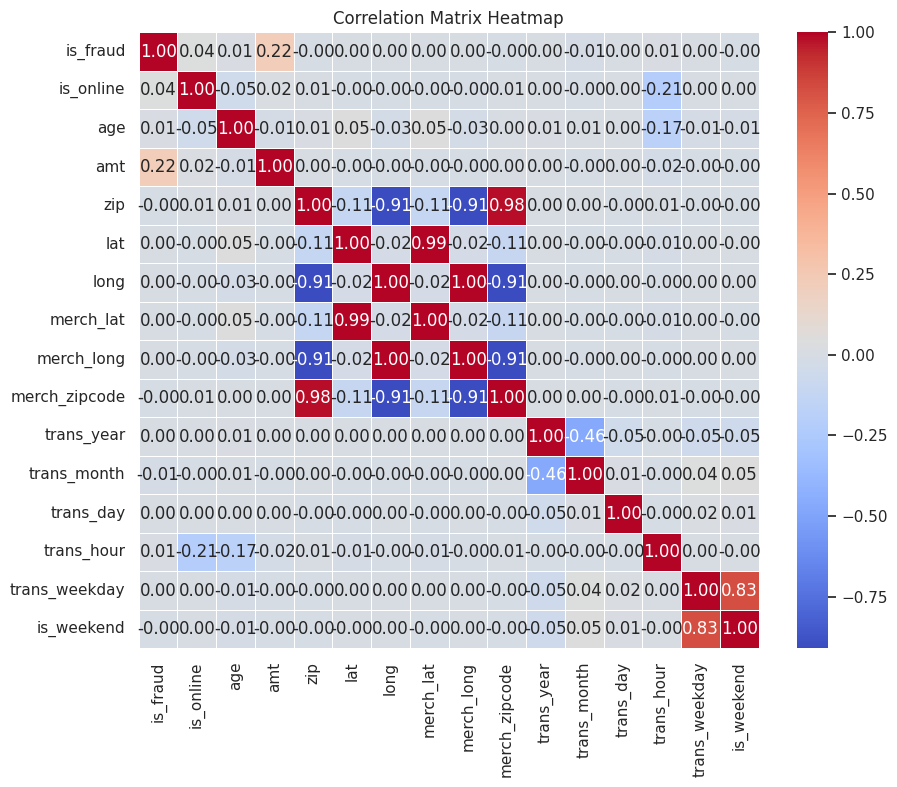

In [ ]:
# Display the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

Transaction amount, online transactions, customers age are slightly correlated to fraudulent activities.

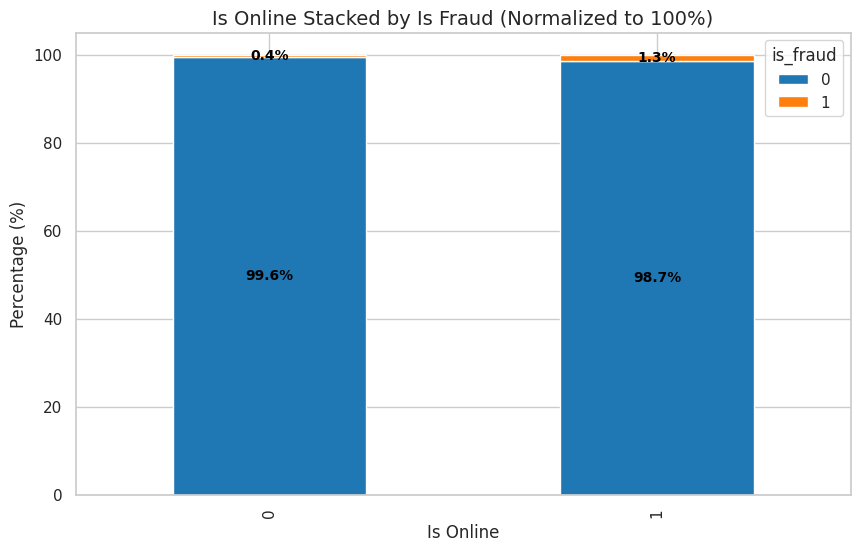

In [ ]:
def plot_stacked_percentage_barchart(df, online_column, fraud_column):
    # Create a crosstab to get counts of 'is_online' and 'is_fraud'
    crosstab = pd.crosstab(df[online_column], df[fraud_column])

    # Normalize the crosstab to percentages along the rows (for each 'is_online' category)
    crosstab_percentage = crosstab.div(crosstab.sum(axis=1), axis=0) * 100

    # Plot the stacked bar chart with percentages
    crosstab_percentage.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'], figsize=(10, 6))

    # Set labels and title
    plt.xlabel('Is Online', fontsize=12)
    plt.ylabel('Percentage (%)', fontsize=12)
    plt.title('Is Online Stacked by Is Fraud (Normalized to 100%)', fontsize=14)

    # Add percentage labels on each bar
    for i, (index, row) in enumerate(crosstab_percentage.iterrows()):
        for j, value in enumerate(row):
            plt.text(i, row[:j].sum() + value / 2, f'{value:.1f}%', ha='center', va='center', color='black', fontsize=10, fontweight='bold')

    # Show the plot
    plt.show()

# Example usage:
plot_stacked_percentage_barchart(df, 'is_online', 'is_fraud')


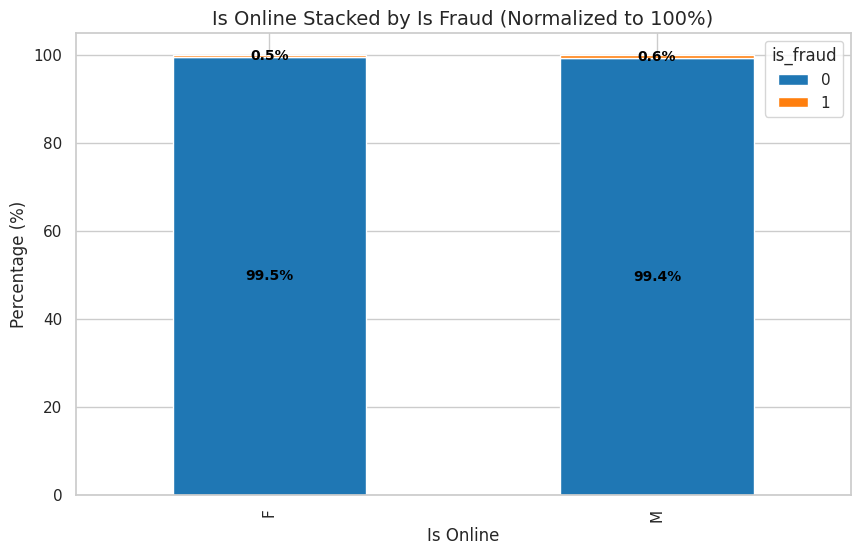

In [ ]:
plot_stacked_percentage_barchart(df, 'gender', 'is_fraud')

<ipython-input-24-0fb35c3d1ad3>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=column, palette=palette)


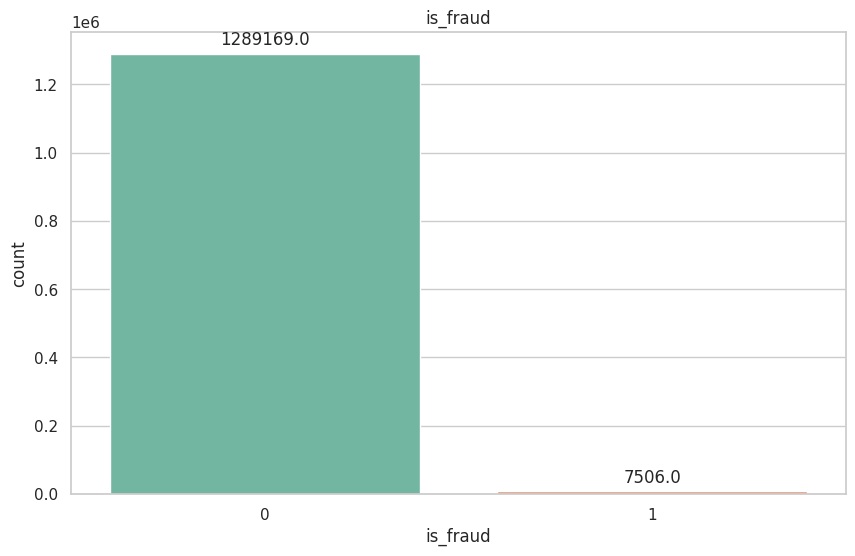

In [ ]:
barchart(df, ['is_fraud'])

<ipython-input-24-0fb35c3d1ad3>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=column, palette=palette)


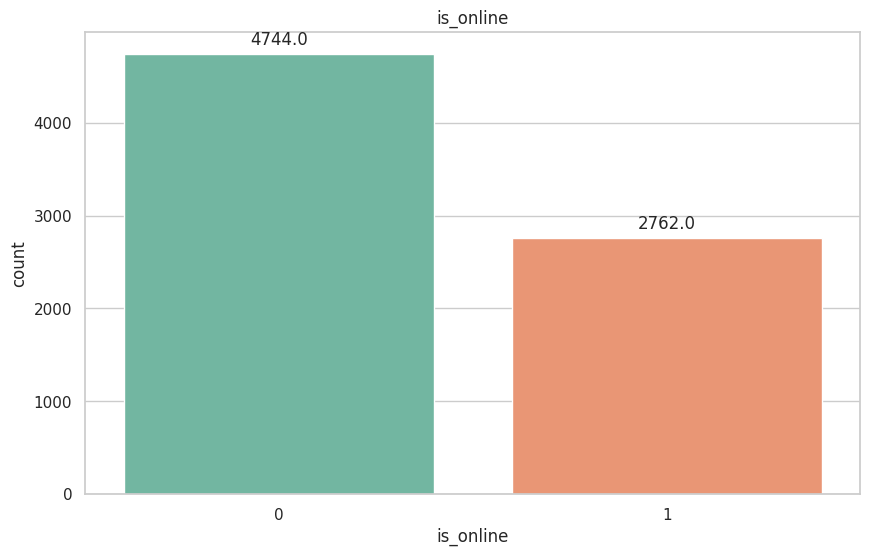

In [ ]:
barchart(df[df['is_fraud'] == 1], ['is_online'])

In [ ]:
def scatter_plot_fraud_vs_amt(df, fraud_column='is_fraud', amt_column='amt'):
    # Create a scatter plot
    plt.figure(figsize=(10, 6))

    # Plot non-fraudulent transactions (is_fraud == 0)
    sns.scatterplot(data=df[df[fraud_column] == 0], x=amt_column, y=fraud_column,
                    color='blue', label='Non-Fraudulent', alpha=0.6)

    # Plot fraudulent transactions (is_fraud == 1)
    sns.scatterplot(data=df[df[fraud_column] == 1], x=amt_column, y=fraud_column,
                    color='red', label='Fraudulent', alpha=0.6)

    # Set the title and labels
    plt.title(f'Scatter Plot of {fraud_column} vs {amt_column}')
    plt.xlabel(amt_column)
    plt.ylabel(fraud_column)

    # Display the legend
    plt.legend(title=fraud_column)

    # Show the plot
    plt.show()

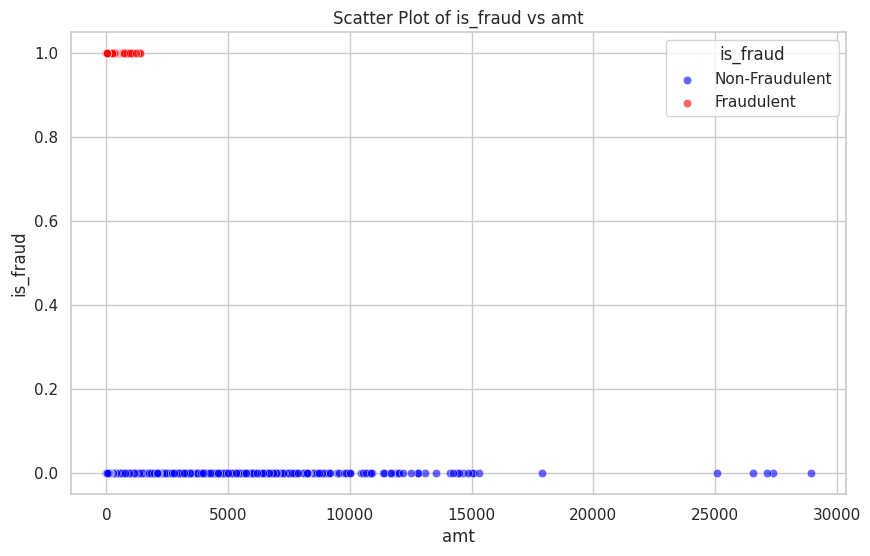

In [ ]:
scatter_plot_fraud_vs_amt(df, 'is_fraud', 'amt')

# Transaction trend

In [ ]:
# use palette_dict to map the color with each category
def horizontal_barchart(df, column, palette_dict):
    # Sort the value counts from high to low
    value_counts = df[column].value_counts().sort_values(ascending=False)

    # Get the corresponding colors for each category based on the fixed palette
    colors = [palette_dict[cat] for cat in value_counts.index]

    # Plot the horizontal bar chart
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x=value_counts.values, y=value_counts.index, palette=colors, orient='h')
    plt.title(f'{column} (Sorted from High to Low)')

    # Add labels to each bar (placed inside the bar)
    for p in ax.patches:
        ax.annotate(f'{int(p.get_width())}',
                    (p.get_width() - p.get_width() * 0.05, p.get_y() + p.get_height() / 2.),
                    ha='right', va='center', xytext=(0, 0), textcoords='offset points',
                    color='white', weight='bold')

    plt.show()

# Get the unique categories from the 'category' column
unique_categories = df['category'].unique()

# Generate a color palette with 14 distinct colors
fixed_palette = sns.color_palette('tab20', n_colors=14)

# Create a dictionary to map each category to a color
category_color_map = dict(zip(unique_categories, fixed_palette))


<ipython-input-44-2a5d308c8aca>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=value_counts.values, y=value_counts.index, palette=colors, orient='h')


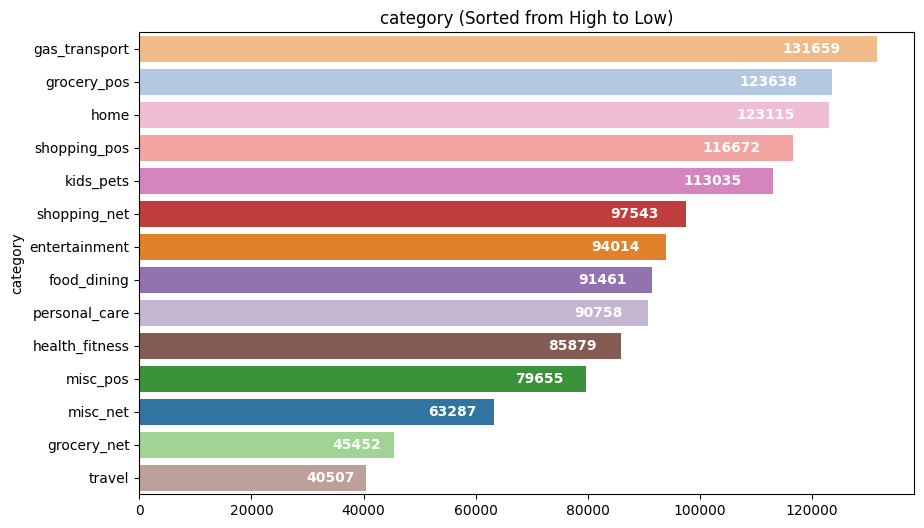

In [ ]:
horizontal_barchart(df, 'category', category_color_map)

<ipython-input-44-2a5d308c8aca>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=value_counts.values, y=value_counts.index, palette=colors, orient='h')


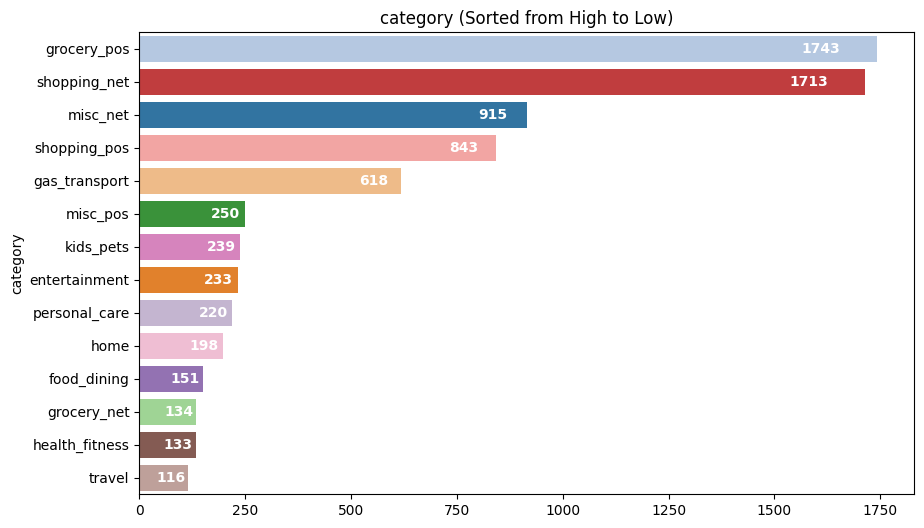

In [ ]:
# Find out the transaction pattern for fraudulent transactions
horizontal_barchart(df[df['is_fraud'] == 1], 'category', category_color_map)

In [ ]:
def plot_line_graph_for_fraud(df, target_column, fraud_column='is_fraud'):
    # Group the data by the target column and fraud column, and get counts
    group_data = df.groupby([target_column, fraud_column]).size().unstack(fill_value=0)

    # Plot the line graph
    plt.figure(figsize=(10, 6))
    for fraud_status in group_data.columns:
        plt.plot(group_data.index, group_data[fraud_status], label=f'Fraud: {fraud_status}')

    # Set the title and labels
    plt.title(f'{fraud_column} distribution across {target_column}')
    plt.xlabel(target_column)
    plt.ylabel('Count')

    # Display legend and show the plot
    plt.legend(title=fraud_column)
    plt.grid(True)
    plt.show()


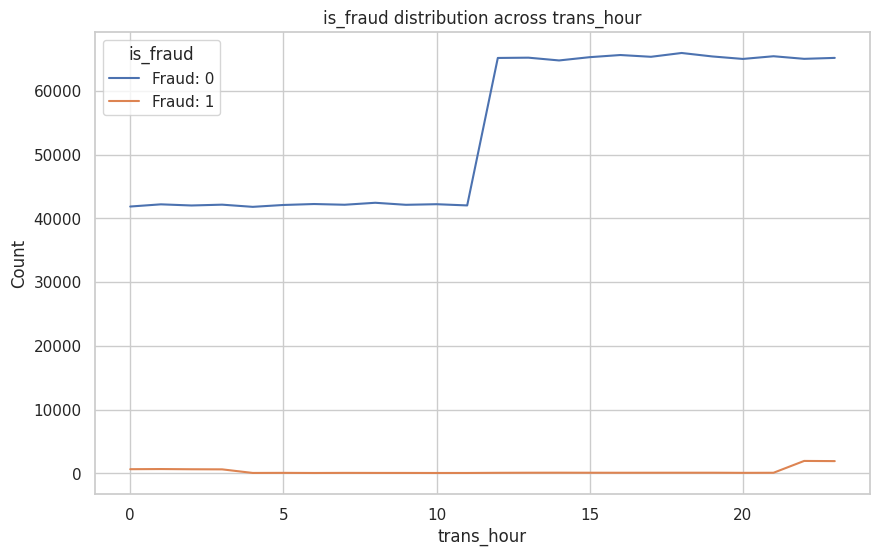

In [ ]:
plot_line_graph_for_fraud(df, 'trans_hour')

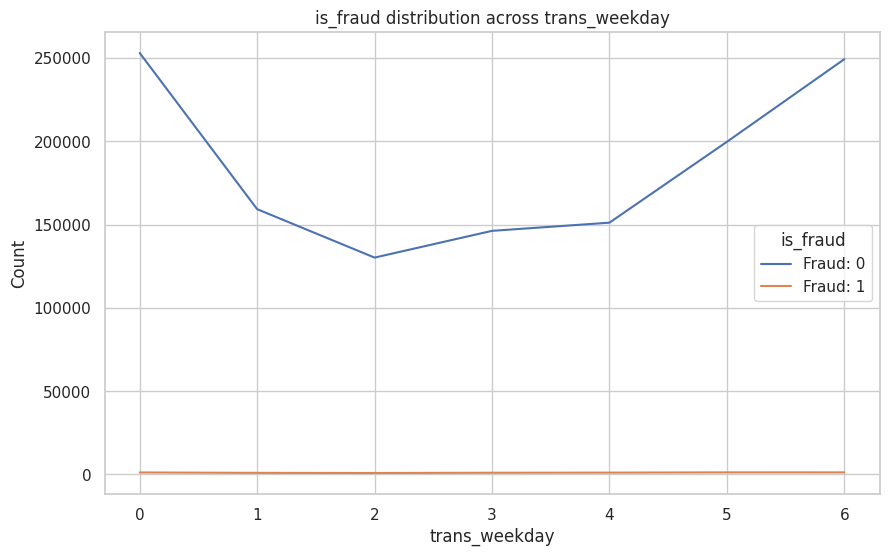

In [ ]:
plot_line_graph_for_fraud(df, 'trans_weekday')